In [ ]:
#Sebastián Celedón y Thiare Guerrero
#Analitica descriptiva

# <span style="color:green;">**Scraping novedades en Steam**</span>

## **1. Importación de librerías y configuración inicial**: En esta sección, se importan las librerías necesarias para el web scraping y análisis de datos. También se establece la URL base de la tienda de Steam.

---



In [ ]:
#Librerías necesarias:
from bs4 import BeautifulSoup #Importamos beatifulsoup para la lectura del contenido de nuestros links.
from matplotlib import pyplot as plt
import requests
import re
import pandas as pd
import seaborn as sns
import plotly.express as px
import time

In [ ]:
!pip install --upgrade matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


## **2. Extracción de enlaces**:
Se realiza un análisis de la página principal de Steam para extraer enlaces. Se usa BeautifulSoup para analizar el contenido HTML y re para extraer los enlaces con expresiones regulares.

In [ ]:
#Definimos la URL base
url_base = "https://store.steampowered.com/"

#Hacemos una solicitud GET a la URL base
response = requests.get(url_base)

#Imprimimos el código de estado de la respuesta
print("Código de estado:", response.status_code)

#Imprimimos los primeros 1000 caracteres del contenido HTML
print("Contenido HTML (primeros 500 caracteres):")
print(response.text[:50000])


Código de estado: 200
Contenido HTML (primeros 500 caracteres):
<!DOCTYPE html>
<html class=" responsive" lang="en">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
			<meta name="viewport" content="width=device-width,initial-scale=1">
		<meta name="theme-color" content="#171a21">
		<title>Welcome to Steam</title>
	<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">

	
	
	<link href="https://store.akamai.steamstatic.com/public/shared/css/motiva_sans.css?v=Rc2hpzg2Ex3T&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/shared/css/shared_global.css?v=cNFo_SNYcn7k&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/shared/css/buttons.css?v=CrrkDubPqLcq&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/css/v6/store.css?v=Rzrd3uCdRpEQ&amp;l=english" rel="stylesheet" type="text/css" >
<l

In [ ]:
# Realiza la solicitud al URL base
respuesta_articulo = requests.get(url_base)

# Analiza el contenido HTML usando BeautifulSoup
sopa_articulo = BeautifulSoup(respuesta_articulo.text, 'lxml')
# Encuentra todos los elementos con la clase "button_container"
contenido = sopa_articulo.find_all("div", {"class": "button_container"})

# Imprime el contenido extraído
print(contenido)

# URL base para las novedades
url_base = "https://store.steampowered.com/explore/new/"

[<div class="button_container" data-panel='{"flow-children":"row"}'>
<a class="big_button" data-panel="[]" href="https://store.steampowered.com/explore/new/?snr=1_4_4__146">
                    New Releases                </a>
<a class="big_button" data-panel="[]" href="https://store.steampowered.com/search/?specials=1&amp;snr=1_4_4__146">
                    Specials                </a>
<a class="big_button" data-panel="[]" href="https://store.steampowered.com/genre/Free to Play/?snr=1_4_4__146">
                    Free Games                </a>
<a class="big_button" data-panel="[]" href="https://store.steampowered.com/tag/browse/?snr=1_4_4__146">
                    By User Tags                </a>
</div>]


In [ ]:
x = re.findall('https[\S ]+6',str(contenido)) # obtenemos los links de interés.
print(x)

['https://store.steampowered.com/explore/new/?snr=1_4_4__146', 'https://store.steampowered.com/search/?specials=1&amp;snr=1_4_4__146', 'https://store.steampowered.com/genre/Free to Play/?snr=1_4_4__146', 'https://store.steampowered.com/tag/browse/?snr=1_4_4__146']


In [ ]:
# Define la función para obtener el enlace deseado
def links(index):
    try:
        return x[index]
    except IndexError:
        return "Índice fuera de rango"

# Obtén el enlace de novedades
print(links(0))

https://store.steampowered.com/explore/new/?snr=1_4_4__146


In [ ]:
# Obtén el request del link de novedades
respuesta_articulo = requests.get(links(0))

# Analiza el contenido HTML usando BeautifulSoup
sopa_articulo = BeautifulSoup(respuesta_articulo.text, 'lxml')
# Encuentra todos los elementos con la clase "tab_see_more"
contenido2 = sopa_articulo.find_all("div", {"class": "tab_see_more"})

# Convierte el contenido a una cadena de texto
contenido2_texto = ' '.join([str(elemento) for elemento in contenido2])
# Encuentra los enlaces usando expresiones regulares
x2 = re.findall(r'https://store\.steampowered\.com[^\s"]*pop[^\s"]*n', contenido2_texto)

# Imprime los enlaces encontrados
print(x2)

['https://store.steampowered.com/search/?filter=popularnew&amp;sort_by=Released_DESC&amp;os=win']


In [ ]:
# Realiza la solicitud al URL base
respuesta_articulo = requests.get(url_base)

# Analiza el contenido HTML usando BeautifulSoup
sopa_articulo = BeautifulSoup(respuesta_articulo.text, 'lxml')
# Encuentra todos los elementos con la clase "button_container"
contenido = sopa_articulo.find_all("div", {"class": "button_container"})

# Imprime el contenido extraído
print(contenido)


[]


## **3. Definicion de funciones:**
Funciones para la extraccion de los datos necesarios a trabajar


In [ ]:
def formatear_plataformas(plataformas):
    plataforma_mapeo = {
        "win": "Windows",
        "mac": "Mac",
        "linux": "Linux"
    }
    return [plataforma_mapeo.get(plataforma, plataforma.capitalize()) for plataforma in plataformas]

def traducir_categoria(categoria):
    traducciones = {
        "Very Positive": "Muy Positivo",
        "Mostly Positive": "Mayormente Positivo",
        "Mixed": "Mixto",
        "Mostly Negative": "Mayormente Negativo",
        "Very Negative": "Muy Negativo",
        "Overwhelmingly Positive": "Absolutamente Positivo",
        "Overwhelmingly Negative": "Absolutamente Negativo",
        "Positive": "Positivo",
        "Negative": "Negativo"
    }
    return traducciones.get(categoria, "Sin categoría")

In [ ]:
def extraer_info_juego(url_juego):
    try:
        respuesta_juego = requests.get(url_juego)
        sopa_juego = BeautifulSoup(respuesta_juego.text, 'lxml')

        valoracion_total = sopa_juego.find('span', class_='game_review_summary').text.strip() if sopa_juego.find('span', class_='game_review_summary') else "Sin valoracion"
        resenas_summary = sopa_juego.find_all('div', class_='user_reviews_summary_row')

        total_resenas = 0
        porcentaje_positividad = 0
        categoria_resenas = ""

        for resena in resenas_summary:
            texto_resena = resena.text.strip()
            if "All Reviews" in texto_resena:
                total_resenas_match = re.search(r'\(([\d,]+)\)', texto_resena)
                porcentaje_match = re.search(r'(\d+)%', texto_resena)

                if total_resenas_match:
                    total_resenas = int(total_resenas_match.group(1).replace(',', ''))

                if porcentaje_match:
                    porcentaje_positividad = int(porcentaje_match.group(1))

                categoria_resenas = valoracion_total.split()[0] + " " + valoracion_total.split()[1] if len(valoracion_total.split()) > 1 else valoracion_total
                categoria_resenas = traducir_categoria(categoria_resenas)
                break

        contenido_generos = sopa_juego.find("span", {"data-panel": True})
        if contenido_generos:
            generos = [genero.text.strip() for genero in contenido_generos.find_all("a")]
        else:
            generos = ["Generos no encontrados"]

        return {
            "Valoracion Total": valoracion_total,
            "Total de Resenas": total_resenas,
            "Porcentaje de Positividad": porcentaje_positividad,
            "Categoria de Resenas": categoria_resenas,
            "Generos": generos
        }
    except Exception as e:
        print(f"Error al extraer informacion del juego: {e}")
        return {
            "Valoracion Total": "Error",
            "Total de Resenas": 0,
            "Porcentaje de Positividad": 0,
            "Categoria de Resenas": "Error al extraer",
            "Generos": ["Error al extraer"]
        }

def extraer_juegos(cantidad):
    juegos = []
    pagina = 1

    while len(juegos) < cantidad:
        try:
            url_paginada = f"https://store.steampowered.com/search/?page={pagina}&cc=us"
            respuesta_articulo = requests.get(url_paginada)
            sopa_articulo = BeautifulSoup(respuesta_articulo.text, 'lxml')
            contenido = sopa_articulo.find_all("a", {"class": "search_result_row"})

            if not contenido:
                break

            for juego in contenido:
                nombre = juego.find("span", {"class": "title"}).text.strip()
                precio = juego.find("div", {"class": "discount_final_price"})
                precio = precio.text.strip() if precio else "Gratis" if "free" in juego.get("class", []) else "Sin precio"
                fecha_lanzamiento = juego.find("div", {"class": "col search_released responsive_secondrow"}).text.strip() if juego.find("div", {"class": "col search_released responsive_secondrow"}) else "Sin fecha"
                plataformas = [img['class'][1] for img in juego.find_all("span", {"class": "platform_img"})]
                plataformas_formateadas = formatear_plataformas(plataformas)

                link_juego = juego["href"]
                info_juego = extraer_info_juego(link_juego)

                juegos.append({
                    "Nombre": nombre,
                    "Precio": precio,
                    "Fecha de Lanzamiento": fecha_lanzamiento,
                    "Plataformas": plataformas_formateadas,
                    "Total de Reseñas": info_juego["Total de Resenas"],
                    "Porcentaje de Positividad": info_juego["Porcentaje de Positividad"],
                    "Categoria de Reseñas": info_juego["Categoria de Resenas"],
                    "Generos": ", ".join(info_juego["Generos"])
                })

                if len(juegos) >= cantidad:
                    break

            pagina += 1
            time.sleep(1)
        except Exception as e:
            print(f"Error al procesar la pagina {pagina}: {e}")
            break

    print(f"Cantidad total de juegos extraidos: {len(juegos)}")
    return juegos


## **Extraccion de datos:**
Se llaman las funciones anteriores y se guarda la informacion en un "csv" cuyo nombre se define como "resultados_juegos_completos.csv"

In [ ]:
# Cantidad de juegos a extraer
juegos_extraidos = extraer_juegos(1000)

# Creacion del dataFrame
df_juegos = pd.DataFrame(juegos_extraidos)

# Aplica transformaciones finales en el dataFrame
df_juegos['Géneros'] = df_juegos['Géneros'].str.replace(', ', ',')  # Eliminar espacios después de la coma si es necesario

# Guardar el dataFrame en un CSV
df_juegos.to_csv('resultados_juegos_completos.csv', index=False, sep=';', encoding='utf-8-sig')
print("Extracción completa. Los resultados se han guardado en 'resultados_juegos_completos.csv'.")

Cantidad total de juegos extraídos: 1000
Extracción completa. Los resultados se han guardado en 'resultados_juegos_completos.csv'.


In [ ]:
df_juegos.head()

,Nombre,Precio,Fecha de Lanzamiento,Plataformas,Total de Reseñas,Porcentaje de Positividad,Categoría de Reseñas,Géneros
0,"Warhammer 40,000: Space Marine 2",$59.99,"Sep 9, 2024",[Windows],70134,81,Muy Positivo,"Action,Adventure,RPG"
1,Counter-Strike 2,Free,"Aug 21, 2012","[Windows, Linux]",8323873,87,Mayormente Positivo,"Action,Free To Play"
2,TCG Card Shop Simulator,$12.99,"Sep 15, 2024",[Windows],6279,96,Absolutamente Positivo,"Simulation,Early Access"
3,THRONE AND LIBERTY,Free,Coming soon,[Windows],5196,65,Mixto,"Action,Adventure,Massively Multiplayer,RPG,Fre..."
4,EA SPORTS FC™ 25,$69.99,"Sep 26, 2024",[Windows],7438,49,Mixto,"Simulation,Sports"


## **Limpieza de datos:**
Tras la correcta obtencion de los datos, se procede a su visualizacion y posterior limpieza, lo que sería como la eliminación de signos ($), espacios vacios, etc.


In [ ]:
# Cargar el CSV en un DataFrame
df_juegos = pd.read_csv('resultados_juegos_completos.csv', sep=';')

# Limpiar los precios
def limpiar_precios(precio):
    if precio == "Free":
        return 0
    elif precio == "Sin precio":
        return None
    else:
        return float(precio.replace('$', '').replace(',', ''))

# Formatear total de reseñas
def formatear_resenas(resenas):
    if isinstance(resenas, int):
        return f"{resenas:,}".replace(',', '.')  # Formato con puntos
    return resenas

# Aplicar la función de limpieza a la columna 'Precio'
df_juegos['Precio'] = df_juegos['Precio'].apply(limpiar_precios)

# Aplicar la función de formateo a la columna 'Total de Reseñas'
df_juegos['Total de Reseñas'] = df_juegos['Total de Reseñas'].apply(formatear_resenas)

# Guardar el DataFrame limpio en un nuevo CSV
df_juegos.to_csv('resultados_juegos_limpios.csv', index=False, sep=';', encoding='utf-8-sig')
print("Los precios y reseñas han sido limpiados y guardados en 'resultados_juegos_limpios.csv'.")


Los precios y reseñas han sido limpiados y guardados en 'resultados_juegos_limpios.csv'.


In [ ]:
# Cargar el DataFrame correcto
df_juegos = pd.read_csv('/content/resultados_juegos_limpios.csv', sep=';')

# Mostrar el nombre de las columnas
print(df_juegos.columns)


Index(['Nombre', 'Precio', 'Fecha de Lanzamiento', 'Plataformas',
       'Total de Reseñas', 'Porcentaje de Positividad', 'Categoría de Reseñas',
       'Géneros'],
      dtype='object')


In [ ]:
df_juegos.head()

,Nombre,Precio,Fecha de Lanzamiento,Plataformas,Total de Reseñas,Porcentaje de Positividad,Categoría de Reseñas,Géneros
0,"Warhammer 40,000: Space Marine 2",59.99,"Sep 9, 2024",['Windows'],70.134,81,Muy Positivo,"Action,Adventure,RPG"
1,Counter-Strike 2,0.00,"Aug 21, 2012","['Windows', 'Linux']",8.323.873,87,Mayormente Positivo,"Action,Free To Play"
2,TCG Card Shop Simulator,12.99,"Sep 15, 2024",['Windows'],6.279,96,Absolutamente Positivo,"Simulation,Early Access"
3,THRONE AND LIBERTY,0.00,Coming soon,['Windows'],5.196,65,Mixto,"Action,Adventure,Massively Multiplayer,RPG,Fre..."
4,EA SPORTS FC™ 25,69.99,"Sep 26, 2024",['Windows'],7.438,49,Mixto,"Simulation,Sports"


## **Visualización y Graficos:**

In [ ]:
# Intentar cargar el DataFrame guardado
try:
    # Cambia el separador si es necesario
    df = pd.read_csv('/content/resultados_juegos_limpios.csv', sep=';')

    # Comprobar los tipos de datos
    print("\nTipos de datos en el DataFrame:")
    print(df.dtypes)

except pd.errors.ParserError as e:
    print(f"Error al leer el CSV: {e}")
except Exception as e:
    print(f"Se produjo un error inesperado: {e}")


Tipos de datos en el DataFrame:
Nombre                        object
Precio                       float64
Fecha de Lanzamiento          object
Plataformas                   object
Total de Reseñas              object
Porcentaje de Positividad      int64
Categoría de Reseñas          object
Géneros                       object
dtype: object


In [ ]:


# Cargar el DataFrame desde el CSV
df_juegos = pd.read_csv('/content/resultados_juegos_limpios.csv', sep=';')

# Reemplazar puntos que son separadores de miles por nada y puntos que son decimales por comas
df_juegos['Total de Reseñas'] = df_juegos['Total de Reseñas'].str.replace('.', '', regex=False)
df_juegos['Total de Reseñas'] = df_juegos['Total de Reseñas'].str.replace(',', '.', regex=False)

# Convertir a tipo numérico
df_juegos['Total de Reseñas'] = pd.to_numeric(df_juegos['Total de Reseñas'], errors='coerce')

# Ordenar el DataFrame por la columna de total de reseñas en orden descendente
df_juegos_sorted = df_juegos.sort_values(by='Total de Reseñas', ascending=False)

# Crear una nueva columna con las reseñas en millones
df_juegos_sorted['Total de Reseñas (millones)'] = df_juegos_sorted['Total de Reseñas'] / 1_000_000

# Mostrar los 5 juegos con más reseñas
top_juegos = df_juegos_sorted[['Nombre', 'Total de Reseñas (millones)']].head(20)
print(top_juegos)


                              Nombre  Total de Reseñas (millones)
1                   Counter-Strike 2                     8.323764
57               PUBG: BATTLEGROUNDS                     2.436184
28                            Dota 2                     2.328461
27                Grand Theft Auto V                     1.718724
21   Tom Clancy's Rainbow Six® Siege                     1.123676
45                   Team Fortress 2                     1.119284
156                         Terraria                     1.062740
22                     Apex Legends™                     0.950547
242                      Garry's Mod                     0.946588
29                              Rust                     0.914816
158                 Wallpaper Engine                     0.762839
330         The Witcher 3: Wild Hunt                     0.727700
20                        ELDEN RING                     0.707415
31                    Cyberpunk 2077                     0.682487
6         

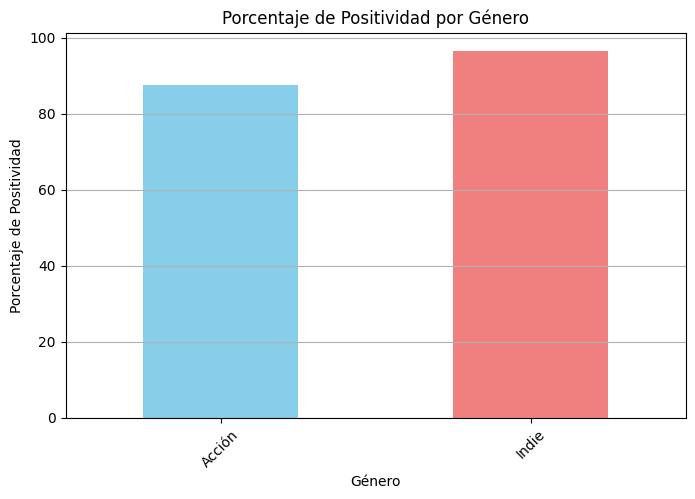

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
df_juegos.groupby('Género')['Porcentaje de Positividad'].mean().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Positividad por Género')
plt.ylabel('Porcentaje de Positividad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

   Género Porcentaje de Positividad                        
                               mean median        std count
0  Acción                 82.428571   87.0  11.193110     7
1   Indie                 96.500000   96.5   0.707107     2
2     RPG                 95.000000   95.0        NaN     1


<ipython-input-21-1934045d68c7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Género', y=('Porcentaje de Positividad', 'mean'), data=df_descriptivo, palette='viridis')


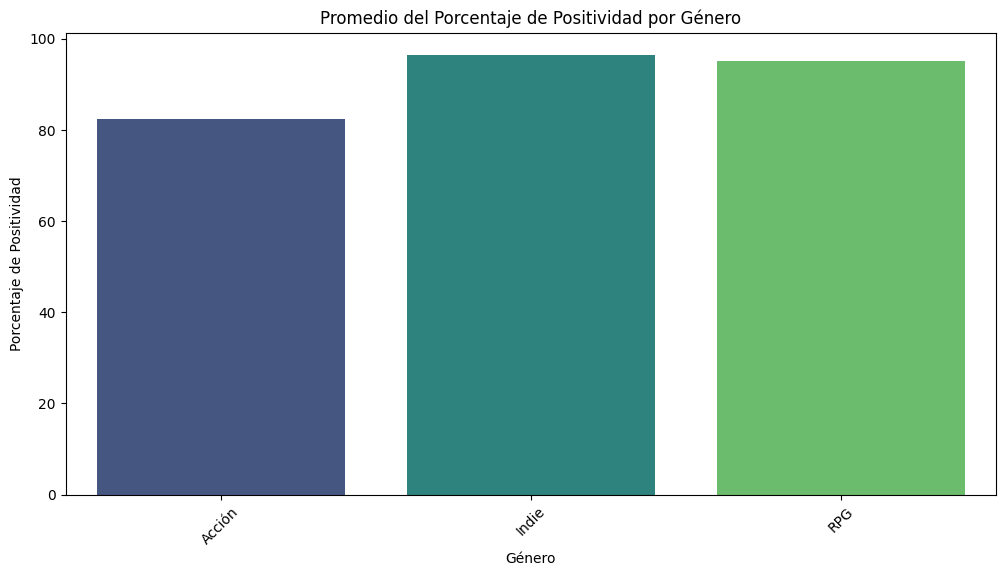

F-statistic: 1.806666033615041, P-value: 0.233003264716252
No hay diferencias significativas entre los géneros en el porcentaje de positividad.


In [ ]:
# Análisis descriptivo por género
df_descriptivo = df_juegos.groupby('Género').agg({
    'Porcentaje de Positividad': ['mean', 'median', 'std', 'count']
}).reset_index()

# Imprimir el resumen descriptivo
print(df_descriptivo)

# Gráfico de barras para comparar el porcentaje de positividad por género
plt.figure(figsize=(12, 6))
sns.barplot(x='Género', y=('Porcentaje de Positividad', 'mean'), data=df_descriptivo, palette='viridis')
plt.title('Promedio del Porcentaje de Positividad por Género')
plt.ylabel('Porcentaje de Positividad')
plt.xticks(rotation=45)
plt.show()

# Test ANOVA para ver si hay diferencias significativas entre géneros
grupos = [df_juegos[df_juegos['Género'] == genero]['Porcentaje de Positividad'] for genero in df_juegos['Género'].unique() if genero in df_juegos['Género'].values]
f_stat, p_value = stats.f_oneway(*grupos)

print(f'F-statistic: {f_stat}, P-value: {p_value}')

# Interpretación del p-value
if p_value < 0.05:
    print("Hay diferencias significativas entre los géneros en el porcentaje de positividad.")
else:
    print("No hay diferencias significativas entre los géneros en el porcentaje de positividad.")
